# dataset source
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E <br>
http://stat-computing.org/dataexpo/2009/the-data.html<br>
didnt match the discription provided

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7<br>

this project covers 2008 flight records for first 4 monthsof the year

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Flight Data Exploration

This document explores a dataset containing flights data 

In [2]:
# reading the dataframe
df_2008=pd.read_csv("2008.csv")

In [3]:
#shape of the dataframe
df_2008.shape

(2389217, 29)

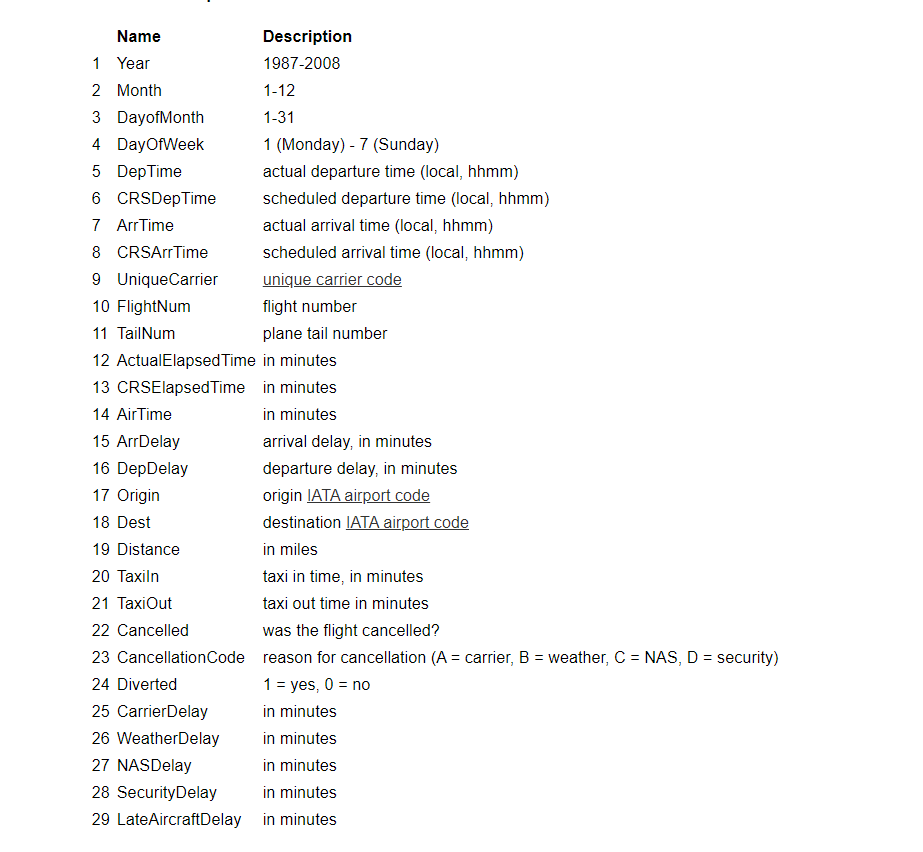

In [4]:
from IPython.display import Image
Image(filename='descr.PNG', width=800) 

In [5]:
#df_2008.head()

In [6]:
#check for duplicates
df_2008.duplicated().any() 

True

In [7]:
#dropping the duplicates
df_2008.drop_duplicates(inplace=True)

In [8]:
#checking duplicates
sum(df_2008.duplicated())

0

**there are alot of null values**<br>
**However i will not drop them now as i am not interested in all of the features**

In [9]:
#checking null values
df_2008.isna().sum()  


Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324771
Diverted                   0
CarrierDelay         1804632
WeatherDelay         1804632
NASDelay             1804632
SecurityDelay        1804632
LateAircraftDelay    1804632
dtype: int64

In [10]:
#df_2008.info()

# What is the structure of your dataset?

the dataset contains(2389217) record and (29) features<br>
some of them looks like a combination of two features of them like<br>
Deptime - CRSDep = Depdelay<br>
ArrTime - CRSArrtime = Arrival delay <br>

**understanding some features meaning**

ElapsedTime = time taken (as by a boat or automobile in traveling over a racecourse)
this means that the Air time doesnt count the time of taking off or the landing<br>
Elapsed Time: The time computed from gate
departure time to gate arrival time.<br>

"NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration.<br>

carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods<br>


aircraft delay is a result of the late arrival of the previous flight that utilized the same plane that will be departing. This causes the current flight to take off late and creates a domino effect


# What is/are the main feature(s) of interest in your dataset?

I am more interested in <br>
1)the contribution of the Air carrier on the delay <br>
2)the contribution of the Air carrier on the cancellation <br>
3)when is the worst time and best time of the year regarding the delays<br>
4)what causes the most departure delay and elapsed delay



# What features in the dataset do you think will help support your investigation into your feature(s) of interest?


Depdelay - Arrival delay - Distance- Cancelled- ActualElapsedTime - CRSElapsedTime- AirTime- UniqueCarrier- Year - Month - DayOfWeek -CarrierDelay-WeatherDelay-NASDelay-SecurityDelay-LateAircraftDelay

**16 features out of 29**

**some features will be combined to make only one feature like (distance and air time to find the velocity)**

# Preliminary Wrangling

In [11]:
# taking the wanted features
df=df_2008.loc[:, [ 'Year' ,'Month' ,'DayOfWeek',
                   'UniqueCarrier','ActualElapsedTime','CRSElapsedTime','AirTime','Distance',
                   'ArrDelay','DepDelay','Cancelled','CarrierDelay','WeatherDelay',
                   'NASDelay','SecurityDelay','LateAircraftDelay']]

In [12]:
df

,Year,Month,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,ArrDelay,DepDelay,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,4,WN,68.0,70.0,55.0,393,16.0,18.0,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,4,WN,82.0,85.0,71.0,441,2.0,5.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,4,WN,87.0,85.0,71.0,441,-4.0,-6.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,4,WN,120.0,130.0,108.0,848,-2.0,8.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,4,WN,123.0,130.0,107.0,848,16.0,23.0,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,4,DL,129.0,132.0,108.0,752,-3.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,4,DL,128.0,124.0,107.0,752,3.0,-1.0,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,4,DL,141.0,138.0,103.0,752,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,4,DL,127.0,126.0,106.0,752,-1.0,-2.0,0,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe()

,Year,Month,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,ArrDelay,DepDelay,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389213.0,2.389213e+06,2.389213e+06,2.319117e+06,2.388806e+06,2.319117e+06,2.389213e+06,2.319117e+06,2.324771e+06,2.389213e+06,584581.000000,584581.000000,584581.000000,584581.000000,584581.000000
mean,2008.0,2.505010e+00,3.909625e+00,1.286188e+02,1.293775e+02,1.051016e+02,7.261584e+02,1.027355e+01,1.143634e+01,2.697206e-02,15.752934,2.938253,16.158442,0.080459,20.976782
std,0.0,1.121493e+00,1.980432e+00,7.025303e+01,6.948246e+01,6.766801e+01,5.571763e+02,3.963431e+01,3.653231e+01,1.620018e-01,40.035534,19.166694,30.534190,1.742582,38.617200
min,2008.0,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,1.700000e+01,-9.100000e+01,-9.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,2.000000e+00,7.800000e+01,8.000000e+01,5.600000e+01,3.250000e+02,-9.000000e+00,-4.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,4.000000e+00,1.110000e+02,1.110000e+02,8.700000e+01,5.830000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,6.000000e+00,1.600000e+02,1.600000e+02,1.340000e+02,9.570000e+02,1.500000e+01,1.100000e+01,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,7.000000e+00,9.050000e+02,1.435000e+03,8.860000e+02,4.962000e+03,2.461000e+03,2.467000e+03,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [14]:
df.Month.unique()  # the dataset covers only the first 4 months of the year

array([1, 2, 3, 4], dtype=int64)

In [15]:
# there are 11 record of zero Airtime and the flight cancelled=0 , diverted = 0
df.query('AirTime == 0').count()[0]   #these records needs to be removed , 
                                     #they are unrelaiable and very small records 11 pout of2389213 

11

In [16]:
#drop the AIR TIME OF 0 Records
df.drop(df.query('AirTime == 0').index,inplace=True);
df.query('AirTime == 0').count()[0]

0

In [17]:
df.isna().sum()  

Year                       0
Month                      0
DayOfWeek                  0
UniqueCarrier              0
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
Distance                   0
ArrDelay               70096
DepDelay               64442
Cancelled                  0
CarrierDelay         1804626
WeatherDelay         1804626
NASDelay             1804626
SecurityDelay        1804626
LateAircraftDelay    1804626
dtype: int64

In [18]:
print('the null percentage in the dataset is ='+(str((70096/df.shape[0])*100)))

the null percentage in the dataset is =2.9338666215749027


**the null values are showing a sort of a pattern this can indicates that these records are special case** 

In [19]:
#DepDelay == null
df.query('Cancelled == 1 & DepDelay !=DepDelay ').count()  # it is better to divide the dataset into two 
                                                  #copies to deal with it in abetter way
                                                 # one for the cancelled and another for the not cancelled
                                                # due to the null values it will leads to infinity if i tried to get the speed

Year                 64442
Month                64442
DayOfWeek            64442
UniqueCarrier        64442
ActualElapsedTime        0
CRSElapsedTime       64323
AirTime                  0
Distance             64442
ArrDelay                 0
DepDelay                 0
Cancelled            64442
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
dtype: int64

In [20]:
df.query('Cancelled == 1').count()


Year                 64442
Month                64442
DayOfWeek            64442
UniqueCarrier        64442
ActualElapsedTime        0
CRSElapsedTime       64323
AirTime                  0
Distance             64442
ArrDelay                 0
DepDelay                 0
Cancelled            64442
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
dtype: int64

**now the null problem appears more so the dataset will be divided into 2 dataset to be easier to deal with regarding my interests as the column operations to create new features will cause problems leading to infinity values**

In [21]:
# creating a copy of the df with only the cancelled records
df_cancel=df.copy()
df_cancel.drop(columns=['CRSElapsedTime','ActualElapsedTime','AirTime','ArrDelay'
                        ,'DepDelay','CarrierDelay','WeatherDelay',
                   'NASDelay','SecurityDelay','LateAircraftDelay'],inplace=True)

df_cancel.drop(df_cancel.query('Cancelled == 0').index,inplace=True)

In [22]:
df_cancel.isna().sum()

Year             0
Month            0
DayOfWeek        0
UniqueCarrier    0
Distance         0
Cancelled        0
dtype: int64

In [23]:
# creating a copy of the df with only record that didnt cancel
df_went=df.copy()
df_went.drop(df_went.query('Cancelled == 1').index,inplace=True)

In [24]:
'null percentage ='+str((df_went.isna().sum()[12]/df_went.shape[0])*100)+'%'

'null percentage =74.8543505566166%'

In [25]:
df_went.isna().sum()

Year                       0
Month                      0
DayOfWeek                  0
UniqueCarrier              0
ActualElapsedTime       5654
CRSElapsedTime           288
AirTime                 5654
Distance                   0
ArrDelay                5654
DepDelay                   0
Cancelled                  0
CarrierDelay         1740184
WeatherDelay         1740184
NASDelay             1740184
SecurityDelay        1740184
LateAircraftDelay    1740184
dtype: int64

**because of this high percentage due to the nulls in the delays these features will be dealt with alone**

In [26]:
df_went.drop(columns=['CarrierDelay','WeatherDelay',
                   'NASDelay','SecurityDelay','LateAircraftDelay'],inplace=True)


In [27]:
df_went

,Year,Month,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,ArrDelay,DepDelay,Cancelled
0,2008,1,4,WN,68.0,70.0,55.0,393,16.0,18.0,0
1,2008,1,4,WN,82.0,85.0,71.0,441,2.0,5.0,0
2,2008,1,4,WN,87.0,85.0,71.0,441,-4.0,-6.0,0
3,2008,1,4,WN,120.0,130.0,108.0,848,-2.0,8.0,0
4,2008,1,4,WN,123.0,130.0,107.0,848,16.0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,4,DL,129.0,132.0,108.0,752,-3.0,0.0,0
2389213,2008,4,4,DL,128.0,124.0,107.0,752,3.0,-1.0,0
2389214,2008,4,4,DL,141.0,138.0,103.0,752,3.0,0.0,0
2389215,2008,4,4,DL,127.0,126.0,106.0,752,-1.0,-2.0,0


In [28]:
#it is only 0.2% of 2389213 so i will drop them
df_went.dropna(inplace=True)
df.drop(df.query('Cancelled == 0 & ActualElapsedTime !=ActualElapsedTime ').index , inplace=True)

In [29]:
df_went.isna().any()[0]

False

In [30]:
#dropping the nulls from df
df.dropna(inplace=True)

# now we have 2 copies of the dataset (one for those who cancelled and another for those who didnt cancel)

**whole data = df**<br>
**cancelled =0 df_went**<br>
**cancelled=1   df_cancel**<br>

# as mentioned before i will be creating new features out of 2 features or more to reduce the dimensionality and to get more useful features

it will be more convineint to have the delay in the elapsed time<br>
ActualElapsedTime-CRSElapsedTime= ElapsedDelay<br>
Also getting the velocity of the plane will be more useful instead of the time , but ill be keeping the distance feature<br>
planspeed= distance/ Air time 

In [31]:
df_went['ElapsedDelay']=df_went['ActualElapsedTime']-df_went['CRSElapsedTime']
df_went.drop(columns=['CRSElapsedTime','ActualElapsedTime'],inplace=True)

In [32]:
df_went

,Year,Month,DayOfWeek,UniqueCarrier,AirTime,Distance,ArrDelay,DepDelay,Cancelled,ElapsedDelay
0,2008,1,4,WN,55.0,393,16.0,18.0,0,-2.0
1,2008,1,4,WN,71.0,441,2.0,5.0,0,-3.0
2,2008,1,4,WN,71.0,441,-4.0,-6.0,0,2.0
3,2008,1,4,WN,108.0,848,-2.0,8.0,0,-10.0
4,2008,1,4,WN,107.0,848,16.0,23.0,0,-7.0
...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,4,DL,108.0,752,-3.0,0.0,0,-3.0
2389213,2008,4,4,DL,107.0,752,3.0,-1.0,0,4.0
2389214,2008,4,4,DL,103.0,752,3.0,0.0,0,3.0
2389215,2008,4,4,DL,106.0,752,-1.0,-2.0,0,1.0


In [33]:
#getting new feature
df_went['planspeed']=(df_went['Distance'])/(df_went['AirTime'])   #this distance in miles/min 

In [34]:
df.columns

Index(['Year', 'Month', 'DayOfWeek', 'UniqueCarrier', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'Distance', 'ArrDelay', 'DepDelay',
       'Cancelled', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [35]:
df_cancel.columns

Index(['Year', 'Month', 'DayOfWeek', 'UniqueCarrier', 'Distance', 'Cancelled'], dtype='object')

In [36]:
df_went.columns

Index(['Year', 'Month', 'DayOfWeek', 'UniqueCarrier', 'AirTime', 'Distance',
       'ArrDelay', 'DepDelay', 'Cancelled', 'ElapsedDelay', 'planspeed'],
      dtype='object')

# Now the dataset df is cleaned and the nulls where dropped except for those that was cancelled as its convineint to keep them 

# Univariate Exploration--------------------------------------------------
I'll start by looking at the distribution of the main variable 

ref=https://indianaiproduction.com/matplotlib-pie-chart/

**the percentage of those who cancel is very low ,however airplane timing is a critical thing so 2.7%  doesnt considered to be a little percentage**

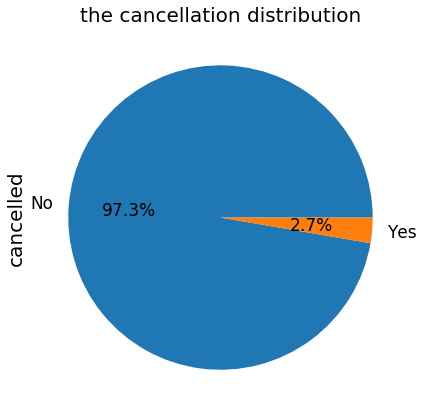

In [37]:
ax = (df_2008['Cancelled'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(7,7), textprops={'fontsize': 17})

#graph polishing
plt.title("the cancellation distribution",fontsize=20);
plt.ylabel("cancelled",fontsize=20);



**the percentage of those who cancel is very low ,however airplane timing is a critical thing so 2.7%  doesnt considered to be a little percentage**

ref=https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/211104e3-a5bc-4247-87b7-06bfa757806c/modules/884648ee-be0a-4bde-853f-26e97458edc8/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/7623c273-f807-4da3-9ce4-93124bc9ce42


Text(0, 0.5, 'count')

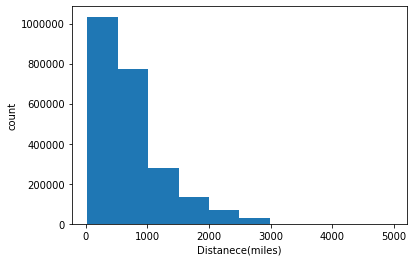

In [38]:
plt.hist(data = df_went, x = 'Distance');
plt.xlabel("Distanece(miles)")
plt.ylabel("count")

**the distance distribution is right-skewed which indicates that most of the flights were for a short distance**

Slide Type
after transforming the distribution to log scale it is still not quit normal distribution and shifted to the right this means that there are alot of flights that coveres the short distance and few for the long distances

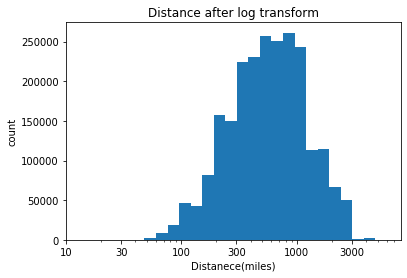

In [39]:
# Get the ticks for bins between [0 - maximum weight]

bins = 10 ** np.arange(np.log10(df_went.Distance.min()), np.log10(df_went.Distance.max())+0.1, 0.1)
# Generate the x-ticks you want to apply

ticks = [10,30,100,300,1000,3000]
# Convert ticks into string values, to be displaye dlong the x-axis

labels = ['{}'.format(v) for v in ticks]
# Plot the histogram

plt.hist(data=df_went, x='Distance', bins=bins);
# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}


#graph polishing

plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels);
plt.title("Distance after log transform");
plt.xlabel("Distanece(miles)");
plt.ylabel("count");

after transforming the distribution to log scale it is still not quit normal distribution and shifted to the right
this means that there are alot of flights that coveres the short distance and few for the long distances

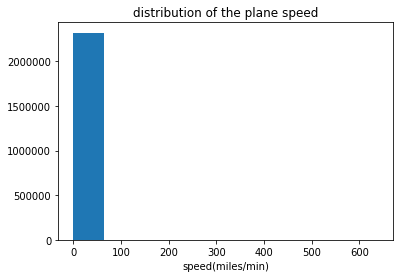

In [40]:
plt.hist(data = df_went, x = 'planspeed');

#graph polishing
plt.title("distribution of the plane speed")
plt.xlabel("speed(miles/min)");

the planes speed seems to be fairly equal

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


**the dataset is biased towards not cancelled as its a very critical thing to cancel a flight so the percentage of 2.7% cancellation makes sense and it is thiught to be alot**<br>
**the distance distribution looked right skewed so it needed a transformation using log for better visiualization
that leads to left shift of the distribution that indicated that most of the flights were short distances**<br>

**the speed of the planes didnt vary alot at every flight which makes us eliminate it from causing any delay effect**


# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**the data contained alot of nulls that looked like having a pattern , the pattern was because the cancelled flights wasnt recorded for all the features and kept as null values , the dataset needed to be split into two for easier invistigation and operation**<br>
**some new features  were calculated like the elapsed delay and the speed and some other related features like departure delay and arrival delay were kept and removed the features derived from it for dimensionality reduction**

# bivariate Exploration --------------------------------------------------------

ref=https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas

ref=https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/customize-plot-colors-labels-matplotlib/


the United States, Canada, Brazil, Japan and other countries consider Sunday as the first day of the week, and while the week begins with Saturday in much of the Middle East, the international ISO 8601 standard[a] and most of Europe has Monday as the first day of the week.

https://en.wikipedia.org/wiki/Week#:~:text=While%2C%20for%20example%2C%20the%20United,first%20day%20of%20the%20week.

so the encoding will be  1 is sunday

# the best day to travel at
thursday has the highest arrival delay and departure delay , which indicates that its the busiest day of the week

tuesday and surprisingly friday are the best days to travel without delays

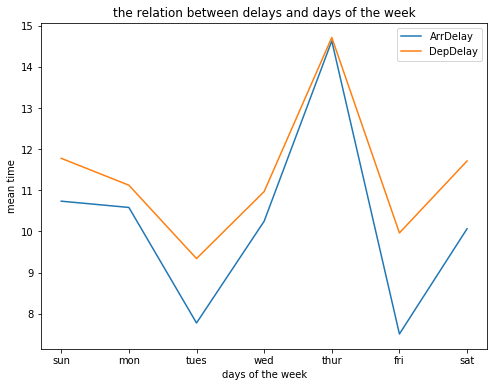

In [41]:
##which day is the worst regarding the delays

# Define plot space
which_day=df_went.groupby('DayOfWeek')[['ArrDelay', 'DepDelay']].mean()
days=['sun','mon','tues','wed','thur','fri','sat']
fig, ax = plt.subplots(figsize=(8, 6))
# Define x and y axes
ax.plot(days,which_day)

#graph polishing
ax.legend(['ArrDelay', 'DepDelay'])
plt.title("the relation between delays and days of the week")

plt.xlabel("days of the week")
plt.ylabel("mean time")
plt.show()

**thursday has the highest arrival delay and departure delay ,  which indicates that its the busiest day of the week** 

**tuesday and surprisingly friday are the best days to travel without delays**

# the best month to travel at
february has the highest arrival delay and departure delay

january score is expected as its a busy time of the year due to holidays

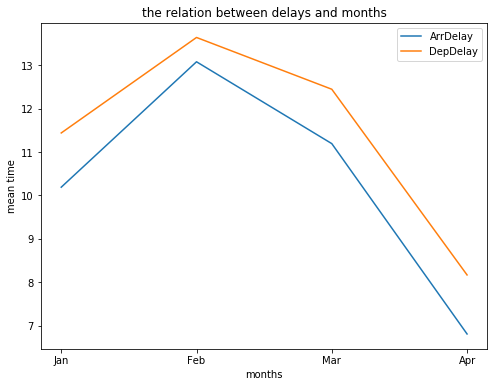

In [42]:
#which month is the worst regarding the delays

# Define plot space
which_month=df_went.groupby('Month')[['ArrDelay', 'DepDelay']].mean()
months=["Jan", "Feb", "Mar", "Apr"]
fig, ax = plt.subplots(figsize=(8, 6))
# Define x and y axes
ax.plot(months,which_month)

#graph polishing
ax.legend(['ArrDelay', 'DepDelay'])
plt.title("the relation between delays and months")
plt.xlabel("months")
plt.ylabel("mean time")
plt.show()

**february has the highest arrival delay and departure delay** 

**january score is expected as its a busy time of the year due to holidays**

# the relation between Arrivaldelay and departure delay
this relationship shows that in some records eventhough there were departure delay some planes arrived early or on time

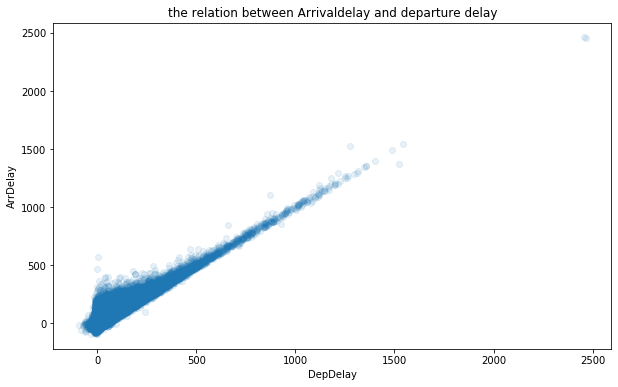

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_went ,x='DepDelay', y='ArrDelay',alpha=1/10)

#graph polishing
plt.xlabel('DepDelay')
plt.ylabel('ArrDelay')
plt.title("the relation between Arrivaldelay and departure delay")
plt.show()

**this relationship shows that in some records eventhough there were departure delay some planes arrived early or on time**

In [44]:
df_went

,Year,Month,DayOfWeek,UniqueCarrier,AirTime,Distance,ArrDelay,DepDelay,Cancelled,ElapsedDelay,planspeed
0,2008,1,4,WN,55.0,393,16.0,18.0,0,-2.0,7.145455
1,2008,1,4,WN,71.0,441,2.0,5.0,0,-3.0,6.211268
2,2008,1,4,WN,71.0,441,-4.0,-6.0,0,2.0,6.211268
3,2008,1,4,WN,108.0,848,-2.0,8.0,0,-10.0,7.851852
4,2008,1,4,WN,107.0,848,16.0,23.0,0,-7.0,7.925234
...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,4,DL,108.0,752,-3.0,0.0,0,-3.0,6.962963
2389213,2008,4,4,DL,107.0,752,3.0,-1.0,0,4.0,7.028037
2389214,2008,4,4,DL,103.0,752,3.0,0.0,0,3.0,7.300971
2389215,2008,4,4,DL,106.0,752,-1.0,-2.0,0,1.0,7.094340


In [45]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.drop(columns=['Cancelled','Year','Month','DayOfWeek','ActualElapsedTime','CRSElapsedTime'],inplace=True)

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
numeric_features.isna().sum()

AirTime              0
Distance             0
ArrDelay             0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

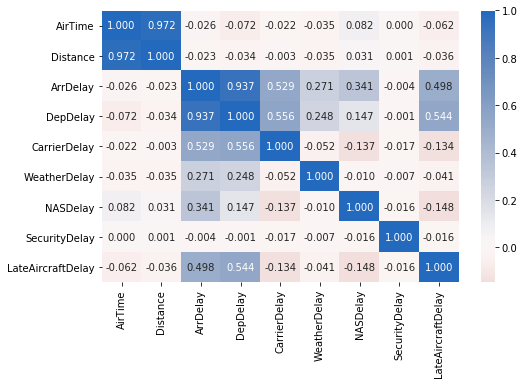

In [47]:
#ref= udacity diamond dataset example
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(numeric_features.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

distance is highly corr with airtime<br>
departure delay and arrival delay are highly corr<br>

elapsed delay and planspeed are negatively correlated which makes sense<br>

departure delay and elapsed delay are negatively correlated



# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**the departure delay and arrival delay surprisingly didnt show a linear relationship , instead it showed that some flights had a departure delay but also arrived early**

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


**the distance is highly corrolated with the Airtime**<br>

**elapsed delay and (departuredelay,late aircraft delay) are negatively correlated**, 
**this is interesting but after thinking as the elapsed delay includes the taking off time and also the domeno effect of the late aircraft**<br>



# Multivariate----------------------------------------------------------------------------

# which carrier is more relaiable regarding delays
AQ and HA carriers arrives early and departure early this can be problematic for late passengers however the bording protocol of the passenger makes them board the plane early they are just early in a range of 0.5 to 2.5 minuits

AA is the worst regarding arrival delay

UA is the worst regrding Departure delay

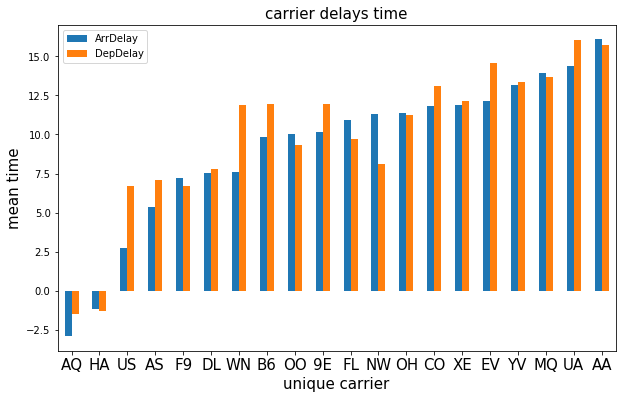

In [48]:
df_went.groupby('UniqueCarrier')[['ArrDelay', 'DepDelay']].mean().sort_values('ArrDelay').plot(kind="bar",figsize=(10,6));

#graph polishing

plt.ylabel('mean time',fontsize=15);
plt.xlabel('unique carrier',fontsize=15);
plt.title("carrier delays time",fontsize=15);
plt.xticks(rotation=0,fontsize=15);

**AQ and HA  carriers arrives early and departure early**
**this can be problematic for late passengers however the bording protocol of the passenger makes them board the plane early**
**they are just early in a range of 0.5 to 2.5 minuits**

**AA is the worst regarding arrival delay**

**UA is the worst regrding Departure delay**

ref=https://www.geeksforgeeks.org/stacked-percentage-bar-plot-in-matplotlib/

#refrence https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn 
#ref=  https://seaborn.pydata.org/generated/seaborn.countplot.html

ALSO used in project 1

In [73]:
#pairplot for bivariate analysis , by adding percentage it gives us information about 3 variables

# k is column name , d is the dataframe
def pairplot(k,d):
    
    #countplotting the bars
    ax=sns.countplot(x=k,data=d,hue='Cancelled',order=d[k].value_counts().sort_values().index)  #pairplot
    
   
    bars = ax.patches
    half = int(len(ax.patches)/2)  
    left_bars = bars[:half]
    right_bars = bars[half:]
   
    #calculating the bars heights
    
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        
        #Adding the percentage to the plot  (va = vertical alignment , ha= horizontal alignment)
        
        ax.text(left.get_x() + left.get_width()/2.
                , height_l + 40, '{0:.0%}'.format(height_l/total)
                , ha="right",va='bottom',fontsize=15,rotation=45)
        
        
        ax.text(right.get_x() + right.get_width()/2.
                , height_r + 40, '{0:.0%}'.format(height_r/total)
                , ha="center",fontsize=12,
        va='bottom',rotation=-45)
        
        


# which carrier is more relaiable regarding cancellations

WN is the most frequesnt carrier

F9 carrier never cancels

the highest cancellation percentage with 6% is YV

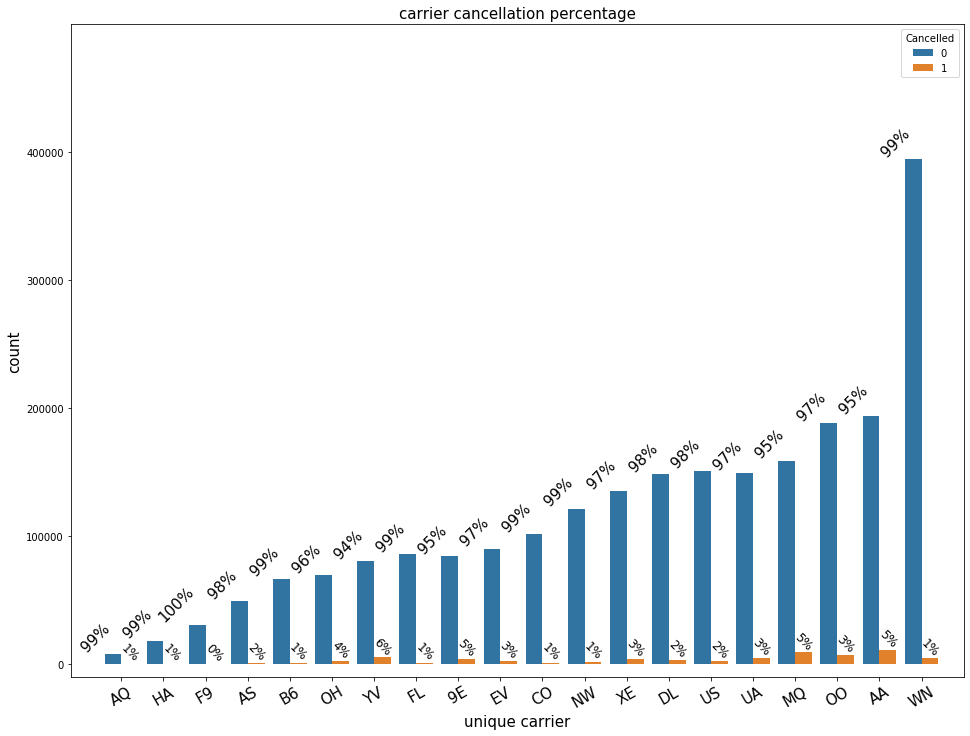

In [74]:
plt.figure(figsize=(16,12))
# specifying the wanted columns
dfc= df_2008.loc[:,['Cancelled','UniqueCarrier']]
pairplot('UniqueCarrier',dfc)

#graph polishing
plt.title("carrier cancellation percentage",fontsize=15);
plt.xticks(rotation=30,fontsize=15);
plt.ylabel('count',fontsize=15);
plt.xlabel('unique carrier',fontsize=15);
plt.ylim([-10000,499900]);
plt.xlim([-1.2,20]);

**WN is the most frequesnt carrier**

**F9 carrier never cancels**


**the highest cancellation percentage with 6% is YV**


In [51]:
df_2008['ElapsedDelay']=df_2008['ActualElapsedTime']-df_2008['CRSElapsedTime']
df_delays= df_2008.loc[:,['DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'
                          ,'LateAircraftDelay','ElapsedDelay']]

df_delays.dropna(inplace=True)
df_delays.isna().sum()

DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
ElapsedDelay         0
dtype: int64

ref=https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [52]:
# stacking the columns to be plotted
dff=pd.melt(df_delays,id_vars=['DepDelay','ElapsedDelay'])
#dropping the zeros delays in the causes
dff.drop(dff.query('value == 0').index,inplace=True);
dff

,DepDelay,ElapsedDelay,variable,value
0,18.0,-2.0,CarrierDelay,16.0
1,23.0,-7.0,CarrierDelay,16.0
2,28.0,-2.0,CarrierDelay,11.0
3,53.0,3.0,CarrierDelay,53.0
4,19.0,20.0,CarrierDelay,10.0
...,...,...,...,...
2922892,19.0,2.0,LateAircraftDelay,19.0
2922893,11.0,10.0,LateAircraftDelay,11.0
2922899,83.0,-6.0,LateAircraftDelay,77.0
2922900,88.0,-7.0,LateAircraftDelay,81.0


ref=#https://note.nkmk.me/en/python-pandas-dataframerename/#:~:text=You%20can%20use%20the%20rename,change%20column%20%2F%20index%20name%20individually.&text=Specify%20the%20original%20name%20and,index%20is%20for%20index%20name.


In [53]:
# stacking the columns to be plotted
dff=pd.melt(df_delays,id_vars=['DepDelay','ElapsedDelay'])

#dropping the zeros delays in the causes
dff.drop(dff.query('value == 0').index,inplace=True);

#renaming the columns
dff = dff.rename(columns={'variable': 'delay_type' ,'value':'time'})

dff

,DepDelay,ElapsedDelay,delay_type,time
0,18.0,-2.0,CarrierDelay,16.0
1,23.0,-7.0,CarrierDelay,16.0
2,28.0,-2.0,CarrierDelay,11.0
3,53.0,3.0,CarrierDelay,53.0
4,19.0,20.0,CarrierDelay,10.0
...,...,...,...,...
2922892,19.0,2.0,LateAircraftDelay,19.0
2922893,11.0,10.0,LateAircraftDelay,11.0
2922899,83.0,-6.0,LateAircraftDelay,77.0
2922900,88.0,-7.0,LateAircraftDelay,81.0


In [54]:
dff.describe()  # seeing the limits for better plotting
                # the 75% quartile top is 65
                #bins

,DepDelay,ElapsedDelay,time
count,923977.000000,923977.000000,923977.000000
mean,49.651517,8.740113,35.371112
std,58.256184,19.675777,46.224902
min,-61.000000,-151.000000,1.000000
25%,15.000000,-3.000000,10.000000
50%,33.000000,6.000000,21.000000
75%,65.000000,17.000000,41.000000
max,2467.000000,570.000000,2436.000000


# the delay causes counts

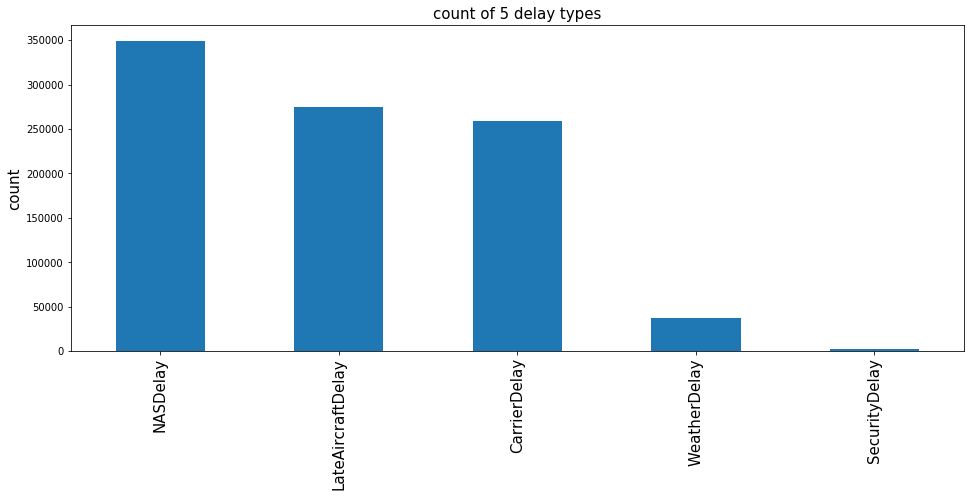

In [55]:
plt.figure(figsize=[16,6])
plt.title("count of 5 delay types",fontsize=15)
plt.ylabel('count',fontsize=15);
dff['delay_type'].value_counts().sort_values(ascending=False).plot(kind='bar');
plt.xticks(fontsize=15);

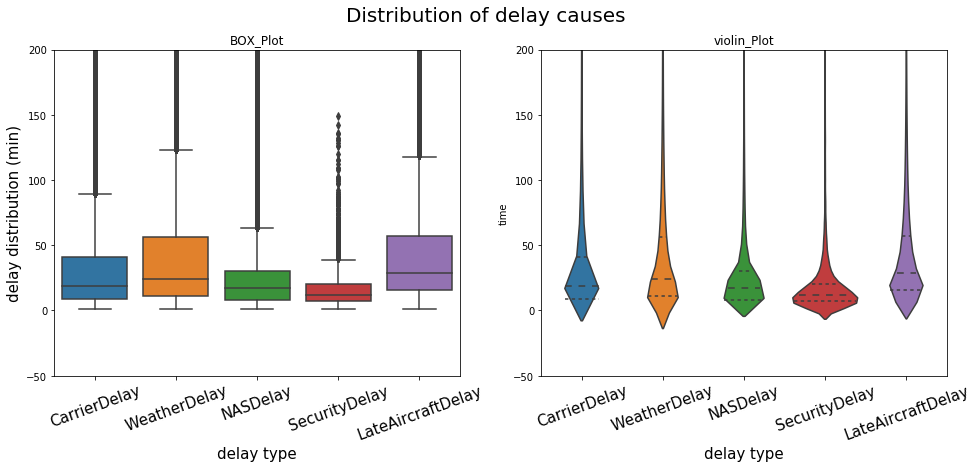

In [56]:
plt.figure(figsize=[16,6])
#global title
plt.suptitle("Distribution of delay causes",fontsize=20)

#------------------------------------------------
#BOXplot
plt.subplot(1,2,1)
sns.boxplot(data= dff, x="delay_type", y="time")
plt.title("BOX_Plot")
plt.ylabel("delay distribution (min)",fontsize=15)
#zoom in
plt.ylim([-50,200])
plt.xticks(rotation=20,fontsize=15);
plt.xlabel('delay type',fontsize=15);
#----------------------------------------
#Violin plot
plt.subplot(1,2,2)
sns.violinplot(data= dff, x="delay_type", y="time",split=True,
                     inner="quartile")
plt.title("violin_Plot")
#zoom in
plt.ylim([-50,200])
plt.xticks(rotation=20,fontsize=15);
plt.xlabel('delay type',fontsize=15);

most of the delay types have outliers , also from the violin plot we can see a better distributions ,the long tails indicates the extreame outliers while for the security delay is the most near distribution for the normal distribution

also late aircraft delay has the highest median

ref=https://pandas.pydata.org/docs/reference/api/pandas.cut.html


In [57]:
dep_clust= np.arange(0,2000,500)
elaps_clust = np.arange(0,500,150)
dff['DepDelay'] = pd.cut(dff.DepDelay, dep_clust)
dff['ElapsedDelay'] = pd.cut(dff.ElapsedDelay, elaps_clust)

# relationship between departure delay and 5 delay causes
# what causes the most  departure delay
weather delay and carrier delay are the main causes of the high departure delay

nasdelay and late aircraft delay causes the departure delay but not alot of time like weather and carrier delay

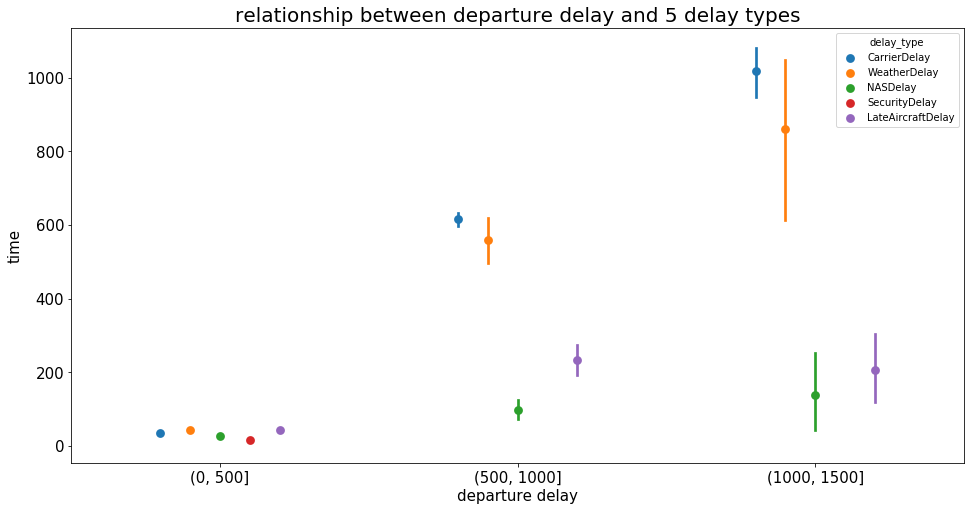

In [58]:
plt.figure(figsize=[16,8])
plt.title("relationship between departure delay and 5 delay types",fontsize=20)
sns.pointplot(data=dff, hue='delay_type', y='time', x='DepDelay', linestyles="", dodge=0.4);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.ylabel('time',fontsize=15);
plt.xlabel('departure delay',fontsize=15);

**weather delay and carrier delay are the main causes of the high departure delay**

**nasdelay and late aircraft delay  causes the departure delay but not alot of time like weather and carrier delay**

# relationship between elapsed delay and 5 delay causes
# what causes the most  elapsed delay?
the main reason of elapsed delay is the nas delay which is strange as the weather delay is very small

this relationship can be explained as the time taken to prepare the plane to fly in harsh weather makes the delay because of weather small while the nas delay high

also the carrier delay looks to have alot of outliers this can be explained as the carriers varies alot with unbalanced numbers of frequency for each carrier in the dataset

also the airport making nas protocol to be able to fly in harsh weather this means that there is a bad weather that causes troubles in taking off and landing or sometimes flying hence, the high elapsed delay

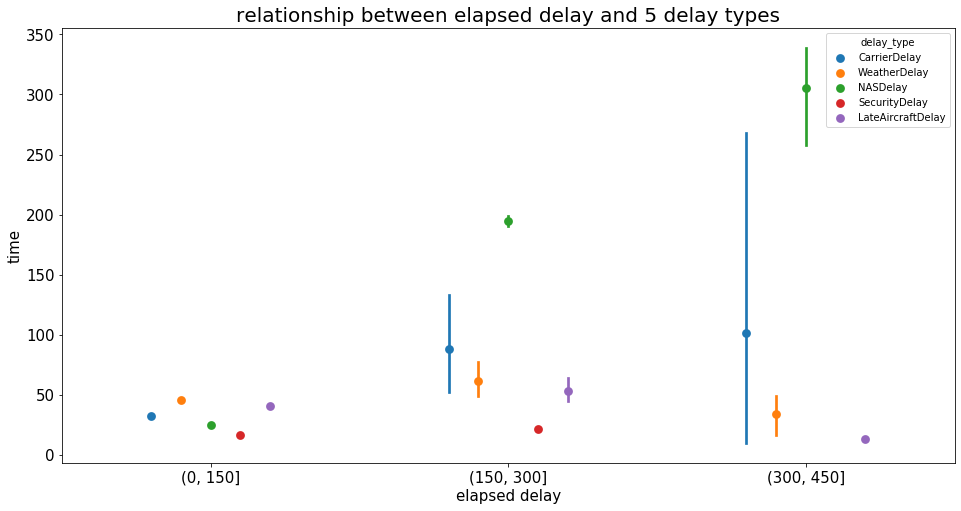

In [59]:
plt.figure(figsize=[16,8])
plt.title("relationship between elapsed delay and 5 delay types",fontsize=20)
sns.pointplot(data=dff, hue='delay_type', y='time', x='ElapsedDelay', linestyles="", dodge=0.4);
plt.ylabel('time',fontsize=15);
plt.xlabel('elapsed delay',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

the main reason of elapsed delay is the nas delay which is strange as the weather delay is very small 

this relationship can be explained as the time taken to prepare the plane to fly in harsh weather makes the delay because of weather small while the nas delay high

also the carrier delay looks to have alot of outliers this can be explained as the carriers varies alot with unbalanced numbers of frequency for each carrier in the dataset


also the airport making nas protocol to be able to fly in harsh weather this means that there is a bad weather that causes troubles in taking off and landing or sometimes flying hence, the high elapsed delay


# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


the longer departure delay the more delay due carrier delay and weather delay

the longer elapsed delay the more delay due to nas delay

# Were there any interesting or surprising interactions between features?

**high nas delay leads to high elapsed time**
this relationship can be explained as the time taken to prepare the plane to fly in harsh weather makes the delay because of weather small while the nas delay high

# Summary

**best time for flight**<br>

thursday has the highest arrival delay and departure delay , which indicates that its the busiest day of the week<br>
tuesday and surprisingly friday are the best days to travel without delays<br>
february has the highest arrival delay and departure delay<br>
january score is expected as its a busy time of the year due to holidays<br>
<br>
**carriers delays**<br>
AQ and HA carriers arrives early and departure early<br>
AA is the worst regarding arrival delay<br>
UA is the worst regrding Departure delay<br>
<br>
**cancellation**<br>

WN is the most frequesnt carrier<br>
F9 carrier never cancels<br>
the highest cancellation percentage with 6% is YV<br>
<br>

**delay causes** <br>
weather delay and carrier delay are the main causes of the high departure delay<br>
nasdelay and late aircraft delay causes the departure delay but not alot of time like weather and carrier delay<br>

the main reason of elapsed delay is the nas delay <br>